# Benchmark performances for SoftwareX paper

### M.Ravasi

In this notebook we will investigate the performance of 4 different operators within the pylops library:

* Diagonal
* Restriction
* FistDerivative
* FFT

In [1]:
%matplotlib inline 
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
import pylops

from timeit import timeit, repeat

In [2]:
# problem size
nmin, nmax = 6, 15

# timing functions
nrepeat = 3
ntime = 100

### Diagonal

In [3]:
# dimensions
nn = [2**i for i in range(nmin, nmax)] # size of operator

# timing functions
nrepeat = 4

tnumpy = np.zeros((len(nn), nrepeat))
tpylops = np.zeros((len(nn), nrepeat))

# compare implementations
for i, n in enumerate(nn):
    print('Working with matrix of size n=%d' % n)
    d = np.random.normal(0,1, n)
    D = np.diag(d)
    Dop = pylops.Diagonal(d)
    x = np.ones(n)
    
    tnumpy[i] = repeat(lambda: np.dot(D, x), number=ntime, repeat=nrepeat)
    tpylops[i] = repeat(lambda: Dop._matvec(x), number=ntime, repeat=nrepeat)

Working with matrix of size n=64
Working with matrix of size n=128
Working with matrix of size n=256
Working with matrix of size n=512
Working with matrix of size n=1024
Working with matrix of size n=2048
Working with matrix of size n=4096
Working with matrix of size n=8192
Working with matrix of size n=16384


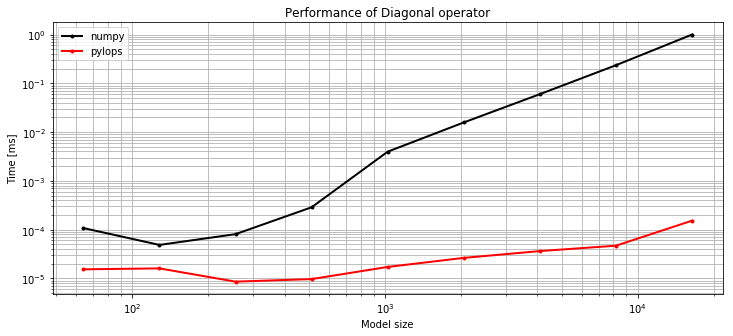

In [4]:
tnumpy_mean, tnumpy_std = 1000*np.mean(tnumpy, axis=1), 1000*np.std(tnumpy, axis=1)
tpylops_mean, tpylops_std = 1000*np.mean(tpylops, axis=1), 1000*np.std(tpylops, axis=1)

plt.figure(figsize=(12, 5))
plt.loglog(nn, tnumpy_mean/tnumpy_mean.max(), '.-k', lw=2, label='numpy')
plt.loglog(nn, tpylops_mean/tnumpy_mean.max(), '.-r', lw=2, label='pylops')
plt.xlabel('Model size')
plt.ylabel('Time [ms]')
plt.title('Performance of Diagonal operator')
plt.grid(which='both')
plt.legend()
plt.axis('tight');

## Derivative

In [5]:
# dimensions
nn = [2**i for i in range(nmin, nmax)] # size of operator

# timing functions
nrepeat = 4

tnumpy = np.zeros((len(nn), nrepeat))
tscipy = np.zeros((len(nn), nrepeat))
tpylops = np.zeros((len(nn), nrepeat))

# compare implementations
for i, n in enumerate(nn):
    print('Working with matrix of size n=%d' % n)
    D = np.eye(n) - np.eye(n, k=-1)
    D = np.eye(n) - np.eye(n, k=-1)
    Dsp = csr_matrix(D)
    Dop = pylops.FirstDerivative(n)
    x = np.ones(n)
    
    tnumpy[i] = repeat(lambda: np.dot(D, x), number=ntime, repeat=nrepeat)
    tscipy[i] = repeat(lambda: Dsp.dot(x), number=ntime, repeat=nrepeat)
    tpylops[i] = repeat(lambda: Dop._matvec(x), number=ntime, repeat=nrepeat)

Working with matrix of size n=64
Working with matrix of size n=128
Working with matrix of size n=256
Working with matrix of size n=512
Working with matrix of size n=1024
Working with matrix of size n=2048
Working with matrix of size n=4096
Working with matrix of size n=8192
Working with matrix of size n=16384


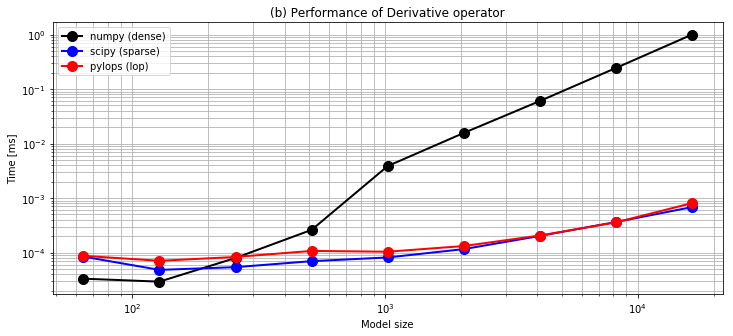

In [6]:
tnumpy_mean, tnumpy_std = 1000*np.mean(tnumpy, axis=1), 1000*np.std(tnumpy, axis=1)
tscipy_mean, tscipy_std = 1000*np.mean(tscipy, axis=1), 1000*np.std(tscipy, axis=1)
tpylops_mean, tpylops_std = 1000*np.mean(tpylops, axis=1), 1000*np.std(tpylops, axis=1)

plt.figure(figsize=(12, 5))
plt.loglog(nn, tnumpy_mean/tnumpy_mean.max(), '.-k', ms=20, lw=2, label='numpy (dense)')
plt.loglog(nn, tscipy_mean/tnumpy_mean.max(), '.-b', ms=20, lw=2, label='scipy (sparse)')
plt.loglog(nn, tpylops_mean/tnumpy_mean.max(), '.-r', ms=20, lw=2, label='pylops (lop)')
plt.xlabel('Model size')
plt.ylabel('Time [ms]')
plt.title('(b) Performance of Derivative operator')
plt.grid(which='both')
plt.legend()
plt.axis('tight');

### Restriction

In [7]:
# dimensions
nn = [2**i for i in range(nmin, nmax)] # size of operator

# subsampling 
perc_subsampling=0.4


tnumpy = np.zeros((len(nn), nrepeat))
tscipy = np.zeros((len(nn), nrepeat))
tpylops = np.zeros((len(nn), nrepeat))

# compare implementations
for i, n in enumerate(nn):
    print('Working with matrix of size n=%d' % n)
    nsub=int(np.round(n*perc_subsampling))
    iava = np.sort(np.random.permutation(np.arange(n))[:nsub])
    R = np.zeros((nsub, n))
    R[np.arange(nsub), iava] = 1
    Rsp = csr_matrix(R)
    Rop = pylops.Restriction(n, iava)
    x = np.ones(n)
    #print(np.dot(R, x)-Rop*x)
    #print(np.dot(R, x)-Rsp.dot(x))

    tnumpy[i] = repeat(lambda: np.dot(R, x), number=ntime, repeat=nrepeat)
    tscipy[i] = repeat(lambda: Rsp.dot(x), number=ntime, repeat=nrepeat)
    tpylops[i] = repeat(lambda: Rop._matvec(x), number=ntime, repeat=nrepeat)

Working with matrix of size n=64
Working with matrix of size n=128
Working with matrix of size n=256
Working with matrix of size n=512
Working with matrix of size n=1024
Working with matrix of size n=2048
Working with matrix of size n=4096
Working with matrix of size n=8192
Working with matrix of size n=16384


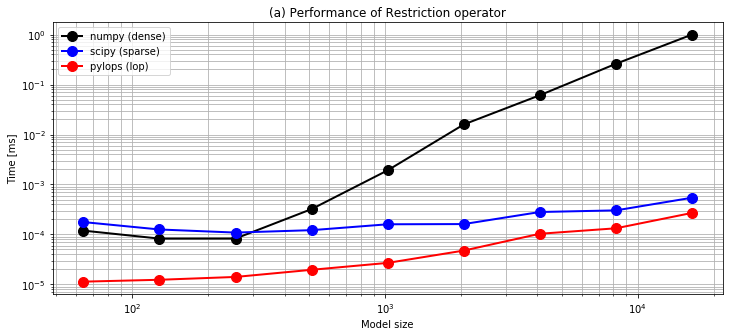

In [8]:
tnumpy_mean, tnumpy_std = 1000*np.mean(tnumpy, axis=1), 1000*np.std(tnumpy, axis=1)
tscipy_mean, tscipy_std = 1000*np.mean(tscipy, axis=1), 1000*np.std(tscipy, axis=1)
tpylops_mean, tpylops_std = 1000*np.mean(tpylops, axis=1), 1000*np.std(tpylops, axis=1)


plt.figure(figsize=(12, 5))
plt.loglog(nn, tnumpy_mean/tnumpy_mean.max(), '.-k', ms=20, lw=2, label='numpy (dense)')
plt.loglog(nn, tscipy_mean/tnumpy_mean.max(), '.-b', ms=20, lw=2, label='scipy (sparse)')
plt.loglog(nn, tpylops_mean/tnumpy_mean.max(), '.-r', ms=20, lw=2, label='pylops (lop)')
plt.xlabel('Model size')
plt.ylabel('Time [ms]')
plt.title('(a) Performance of Restriction operator')
plt.grid(which='both')
plt.legend()
plt.axis('tight');

### FFT

Comparison between dense and linear operator

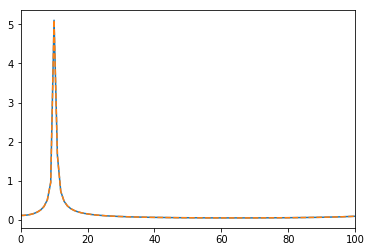

In [9]:
dt = 0.004
n=128
t = np.arange(n)*dt
f = np.fft.fftfreq(n, dt)
T, F = np.meshgrid(t, f, indexing='ij')
FFT = (1./np.sqrt(n))*np.exp(1j*2*np.pi*T*F)
FFTnp = pylops.signalprocessing.FFT(n, sampling=dt)

x = np.sin(2*np.pi*20*t)
y = np.dot(FFT, x)
yop = FFTnp*x

plt.figure()
plt.plot(np.abs(y))
plt.plot(np.abs(yop), '--')
plt.xlim(0,100);

In [10]:
# dimensions
nn = [2**i for i in range(nmin, nmax)] # size of operator
dt = 0.004

# timing functions
nrepeat = 4
ntime = 100

tdense = np.zeros((len(nn), nrepeat))
tnumpy = np.zeros((len(nn), nrepeat))
tfftw = np.zeros((len(nn), nrepeat))

# compare implementations
for i, n in enumerate(nn):
    print('Working with matrix of size n=%d' % n)
    t = np.arange(n)*dt
    f = np.fft.fftfreq(n, dt)
    T, F = np.meshgrid(t, f, indexing='ij')
    FFT = (1./np.sqrt(n))*np.exp(1j*2*np.pi*T*F)
    FFTnp = pylops.signalprocessing.FFT(n, sampling=dt)
    FFTfftw = pylops.signalprocessing.FFT(n, nfft=n, sampling=dt, engine='fftw')
    x = np.ones(n)
    #print(np.dot(FFT, x)-FFTnp*x)
    #print(np.dot(FFT, x)-FFTfftw.dot(x))
    
    tdense[i] = repeat(lambda: np.dot(FFT, x), number=ntime, repeat=nrepeat)
    tnumpy[i] = repeat(lambda: FFTnp._matvec(x), number=ntime, repeat=nrepeat)
    tfftw[i] = repeat(lambda: FFTfftw._matvec(x), number=ntime, repeat=nrepeat)

Working with matrix of size n=64
Working with matrix of size n=128
Working with matrix of size n=256
Working with matrix of size n=512
Working with matrix of size n=1024
Working with matrix of size n=2048
Working with matrix of size n=4096
Working with matrix of size n=8192
Working with matrix of size n=16384


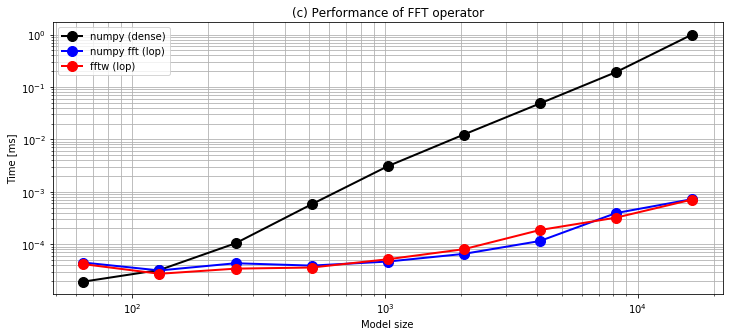

In [11]:
tdense_mean, tdense_std = 1000*np.mean(tdense, axis=1), 1000*np.std(tdense, axis=1)
tnumpy_mean, tnumpy_std = 1000*np.mean(tnumpy, axis=1), 1000*np.std(tnumpy, axis=1)
tfftw_mean, tfftw_std = 1000*np.mean(tfftw, axis=1), 1000*np.std(tfftw, axis=1)

plt.figure(figsize=(12, 5))
plt.loglog(nn, tdense_mean/tdense_mean.max(), '.-k', ms=20, lw=2, label='numpy (dense)')
plt.loglog(nn, tnumpy_mean/tdense_mean.max(), '.-b', ms=20, lw=2, label='numpy fft (lop)')
plt.loglog(nn, tfftw_mean/tdense_mean.max(), '.-r', ms=20, lw=2, label='fftw (lop)')
plt.xlabel('Model size')
plt.ylabel('Time [ms]')
plt.title('(c) Performance of FFT operator')
plt.grid(which='both')
plt.legend()
plt.axis('tight');